
#1.   Create a straight line dataset using the linear regression formula (weight * X + bias).
  -Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
  
  -Split the data into 80% training, 20% testing.
  
  -Plot the training and testing data so it becomes visual.
  



In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device} \nPyTorch version: {torch.__version__}")

'''
weight=0.3
bias=0.9
X = torch.arange(0, 1, 0.2).unsqueeze(dim= 1)
y = weight * X + bias

'''
weight = 0.3
bias = 0.9
X = torch.linspace(0, 1, 100).unsqueeze(dim=1)  # 100 amostras no intervalo [0, 1]
y = weight * X + bias




Rodando na cpu 
PyTorch version: 2.5.1+cu121


In [ ]:
train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_test), len(x_train), len(y_test), len(y_train)

(20, 80, 20, 80)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#2. Build a PyTorch model by subclassing nn.Module.
-Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

-Implement the forward() method to compute the linear regression function

-you used to create the dataset in 1.
Once you've constructed the model, make an instance of it and check its state_dict().

In [ ]:
class LinearNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        return self.weight * x + self.bias

In [ ]:
torch.manual_seed(42)
model = LinearNetwork().to(device)
model, model.state_dict()

(LinearNetwork(),
 OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))]))

#3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

-Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

-Write a training loop to perform the appropriate training steps for 300 epochs.

-The training loop should test the model on the test dataset every 20 epochs.


In [ ]:
lossfunc = nn.L1Loss() # Loss function: Mean Absolute Error
#lossfunc = nn.MSELoss() #(erro quadrático médio)
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-3)

In [ ]:
def train(model, dataloader, loss_func, optimizer):
    model.train()
    cumloss = 0.0

    for X, y in dataloader:
        X = X.unsqueeze(1).float().to(device)
        y = y.unsqueeze(1).float().to(device)

        pred = model(X)
        loss = loss_func(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cumloss += loss.item()

    return cumloss / len(dataloader)

def test(model, dataloader, loss_func):
    model.eval()
    cumloss = 0.0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.unsqueeze(1).float().to(device)
            y = y.unsqueeze(1).float().to(device)

            pred = model(X)
            loss = loss_func(pred, y)
            cumloss += loss.item()

    return cumloss / len(dataloader)


#4. Make predictions with the trained model on the test data.

-Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(model, X, y):
    model.eval()
    with torch.no_grad():
        y_pred = model(X.to(device))

    plt.scatter(X.cpu(), y.cpu(), label="Ground Truth")
    plt.plot(X.cpu(), y_pred.cpu(), color="red", label="Prediction")
    plt.legend()
    plt.show()



Epoch 0: Train Loss: 0.2477, Test Loss: 0.5373


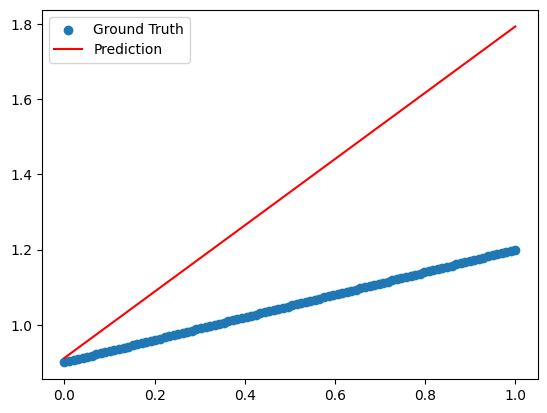

Epoch 20: Train Loss: 0.1861, Test Loss: 0.4607


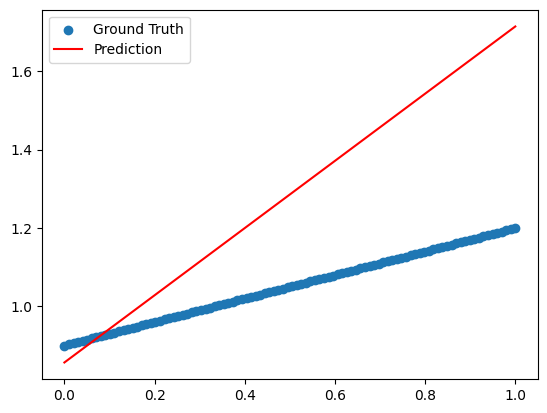

Epoch 40: Train Loss: 0.1449, Test Loss: 0.3987


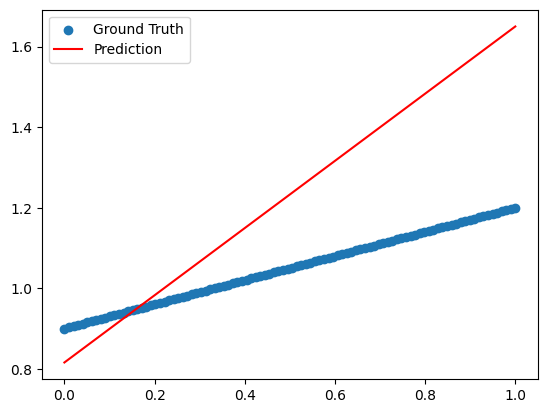

Epoch 60: Train Loss: 0.1194, Test Loss: 0.3505


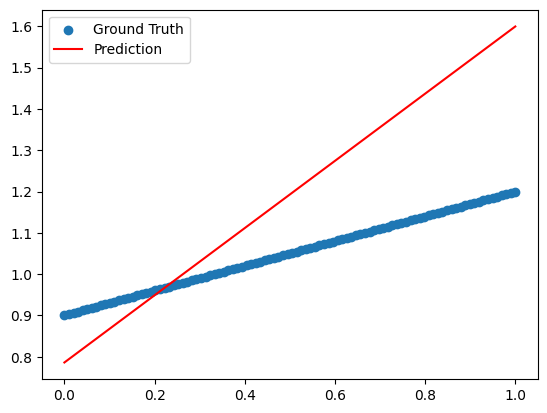

Epoch 80: Train Loss: 0.1062, Test Loss: 0.3112


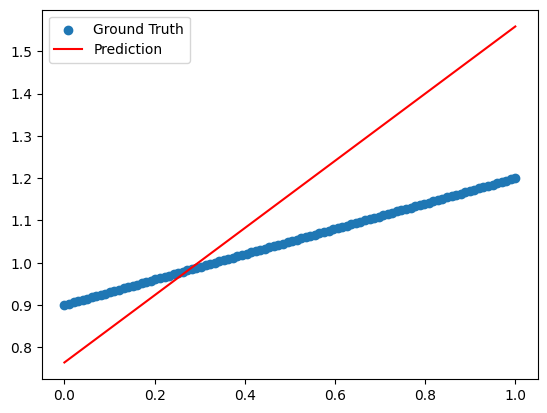

Epoch 100: Train Loss: 0.1008, Test Loss: 0.2810


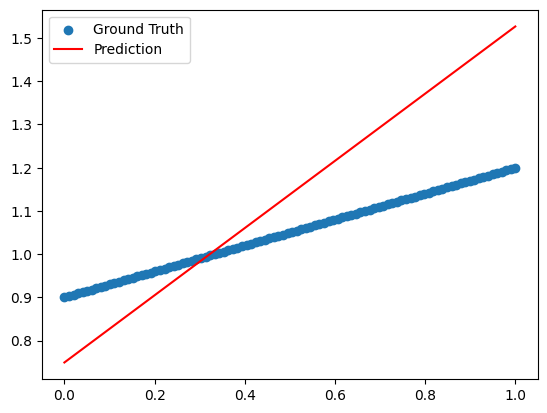

Epoch 120: Train Loss: 0.0942, Test Loss: 0.2574


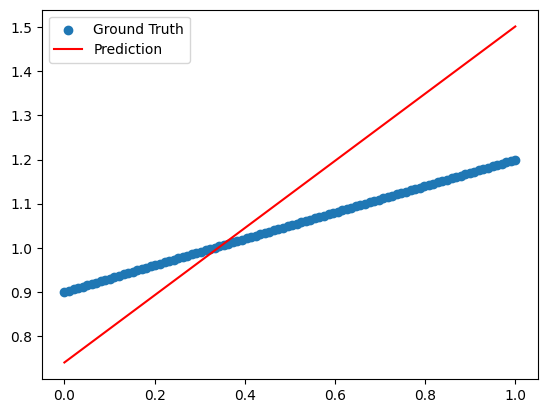

Epoch 140: Train Loss: 0.0900, Test Loss: 0.2388


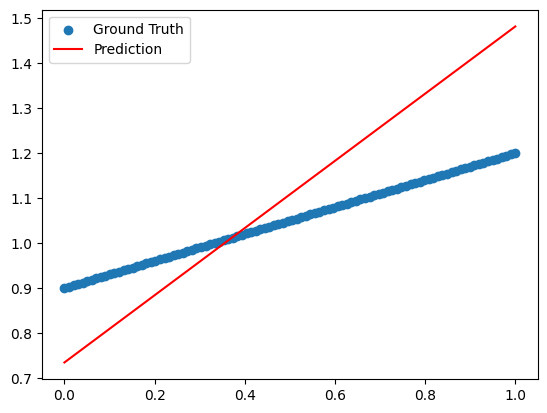

Epoch 160: Train Loss: 0.0885, Test Loss: 0.2243


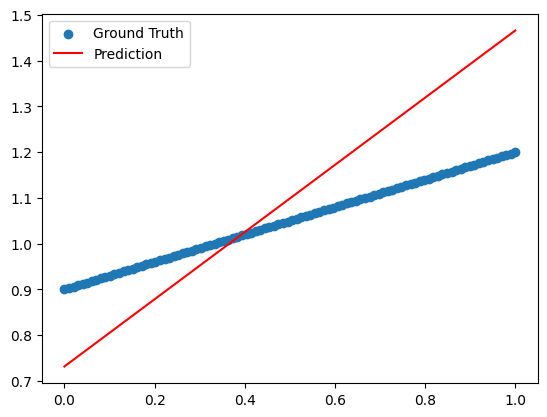

Epoch 180: Train Loss: 0.0845, Test Loss: 0.2115


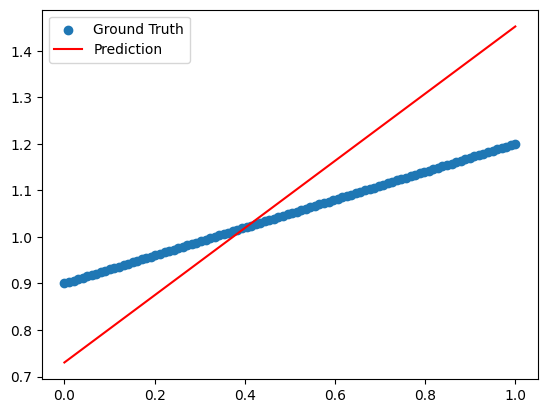

Epoch 200: Train Loss: 0.0831, Test Loss: 0.2021


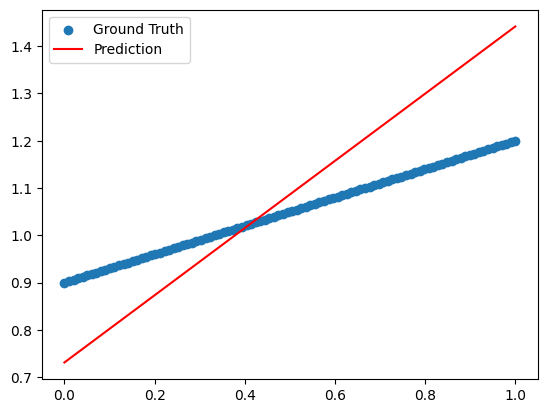

Epoch 220: Train Loss: 0.0798, Test Loss: 0.1948


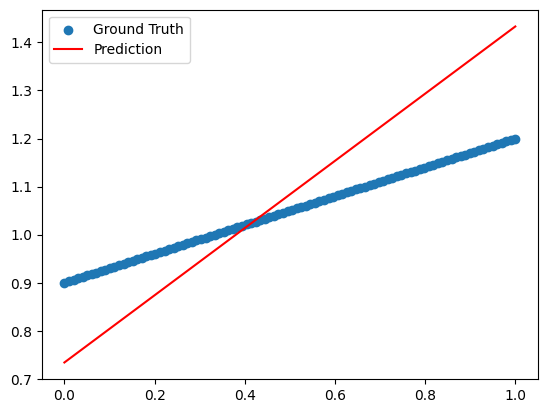

Epoch 240: Train Loss: 0.0792, Test Loss: 0.1883


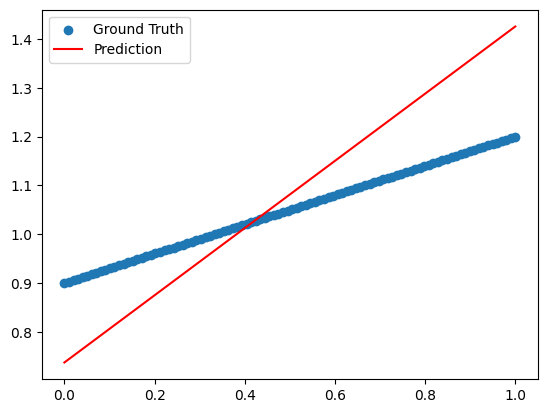

Epoch 260: Train Loss: 0.0739, Test Loss: 0.1822


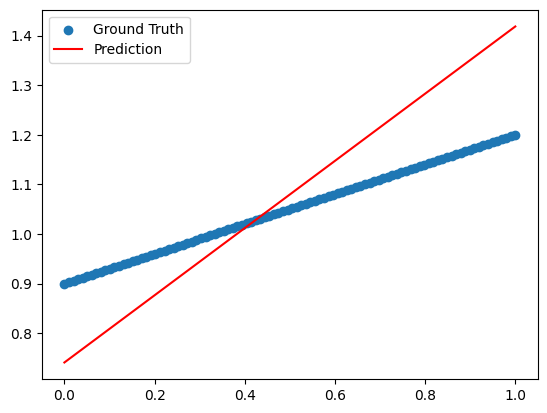

Epoch 280: Train Loss: 0.0737, Test Loss: 0.1759


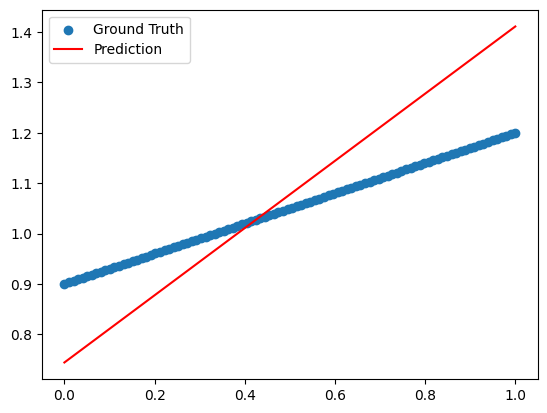

Epoch 300: Train Loss: 0.0734, Test Loss: 0.1706


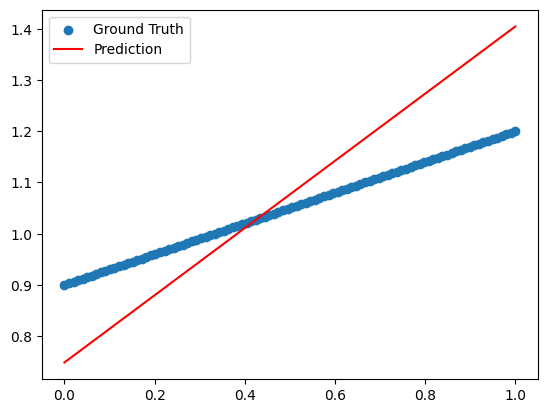

Epoch 320: Train Loss: 0.0712, Test Loss: 0.1647


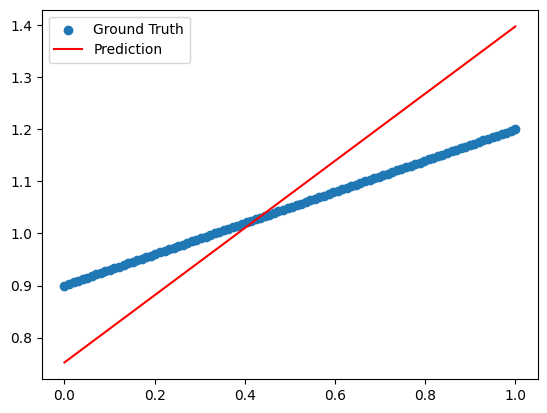

Epoch 340: Train Loss: 0.0664, Test Loss: 0.1587


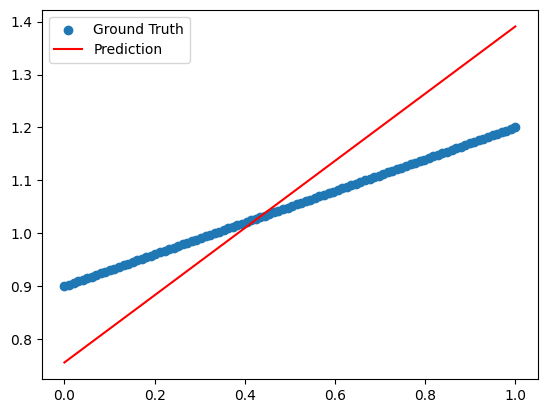

Epoch 360: Train Loss: 0.0676, Test Loss: 0.1532


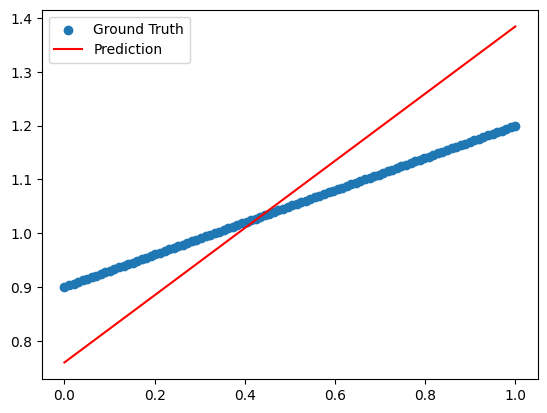

Epoch 380: Train Loss: 0.0658, Test Loss: 0.1486


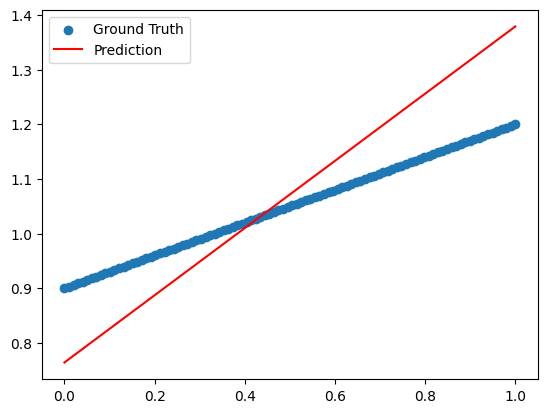

Epoch 400: Train Loss: 0.0607, Test Loss: 0.1438


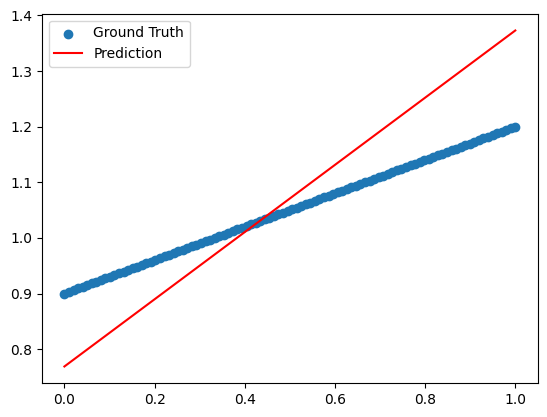

Epoch 420: Train Loss: 0.0596, Test Loss: 0.1391


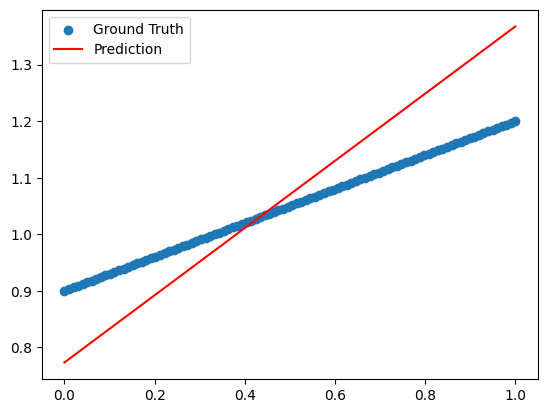

Epoch 440: Train Loss: 0.0593, Test Loss: 0.1355


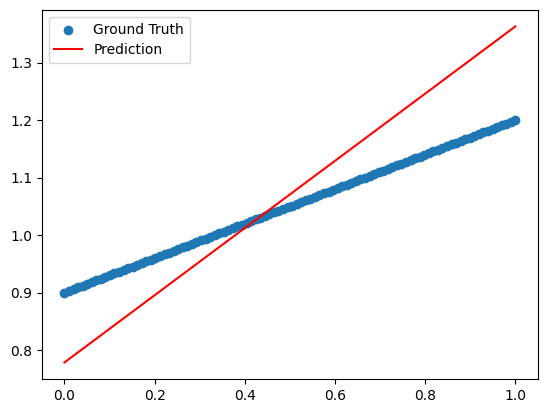

Epoch 460: Train Loss: 0.0571, Test Loss: 0.1308


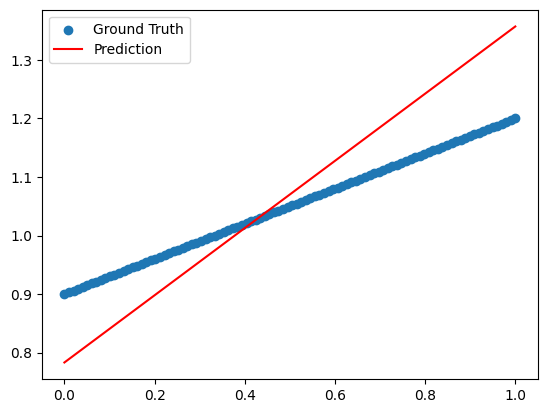

Epoch 480: Train Loss: 0.0524, Test Loss: 0.1256


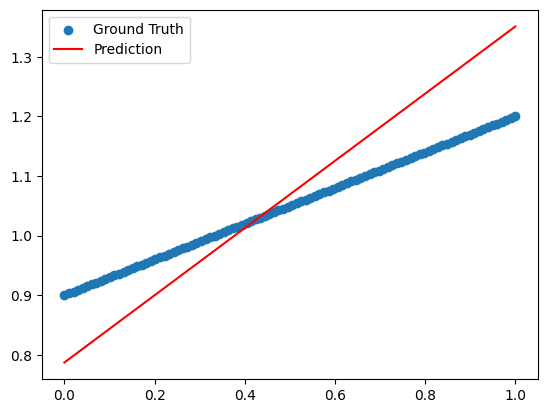

Epoch 500: Train Loss: 0.0520, Test Loss: 0.1220


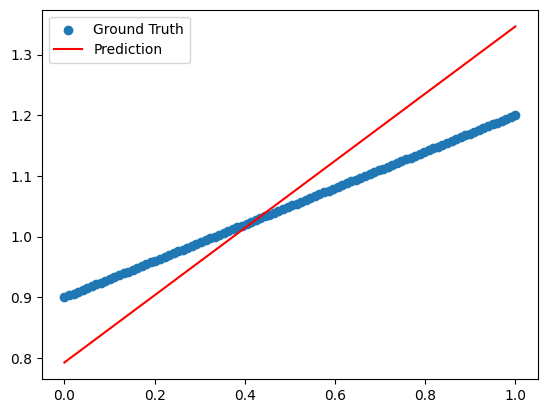

Epoch 520: Train Loss: 0.0478, Test Loss: 0.1153


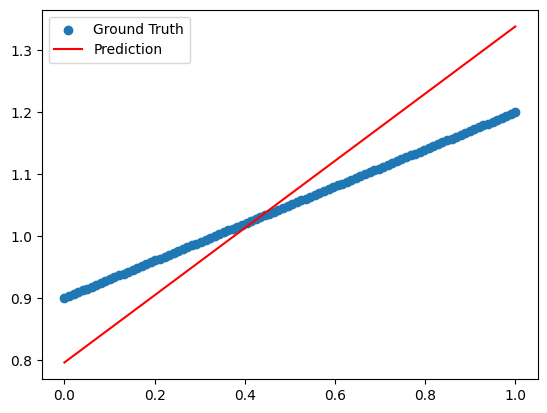

Epoch 540: Train Loss: 0.0488, Test Loss: 0.1102


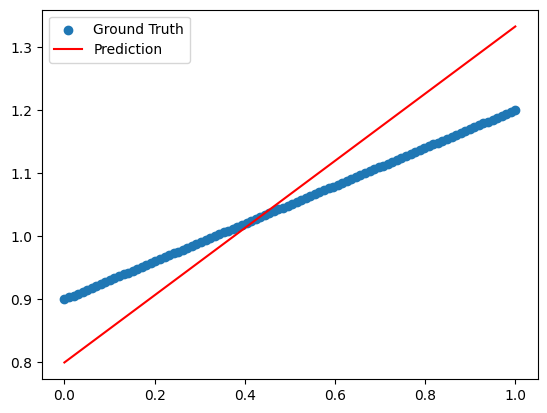

Epoch 560: Train Loss: 0.0466, Test Loss: 0.1045


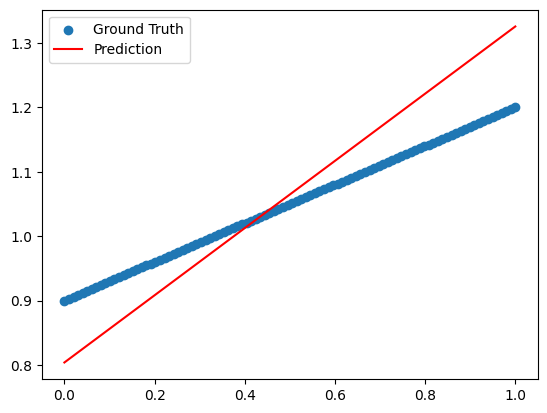

Epoch 580: Train Loss: 0.0431, Test Loss: 0.1003


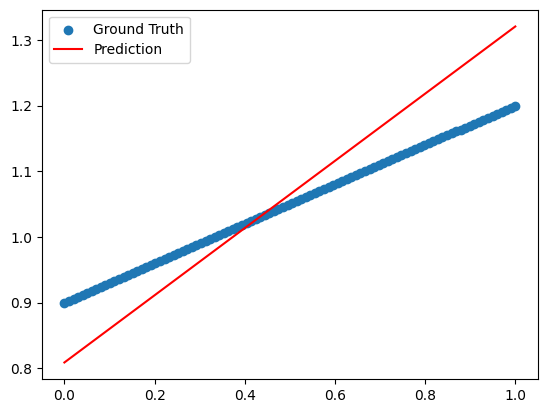

Epoch 600: Train Loss: 0.0404, Test Loss: 0.0961


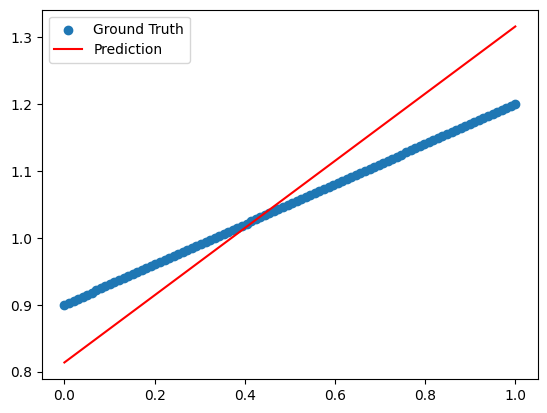

Epoch 620: Train Loss: 0.0399, Test Loss: 0.0916


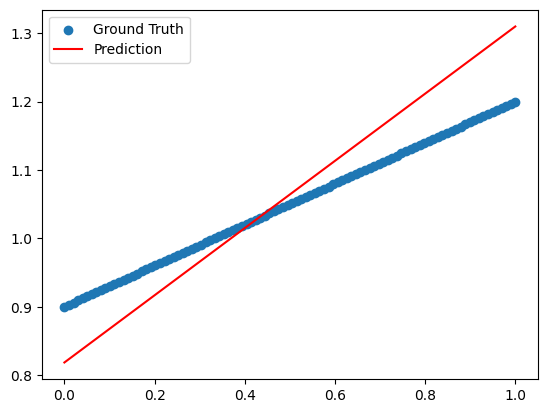

Epoch 640: Train Loss: 0.0373, Test Loss: 0.0862


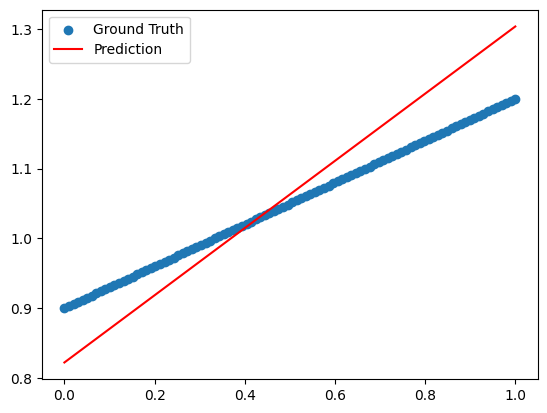

Epoch 660: Train Loss: 0.0356, Test Loss: 0.0815


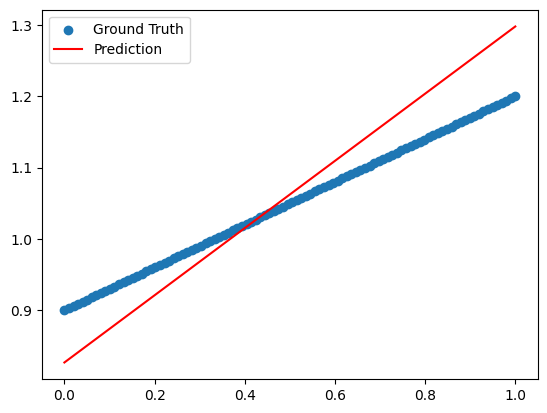

Epoch 680: Train Loss: 0.0324, Test Loss: 0.0763


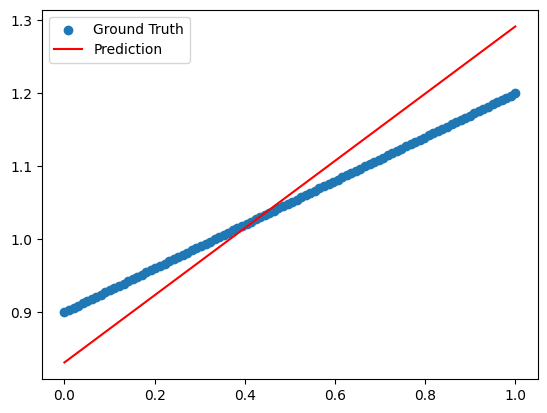

Epoch 700: Train Loss: 0.0318, Test Loss: 0.0717


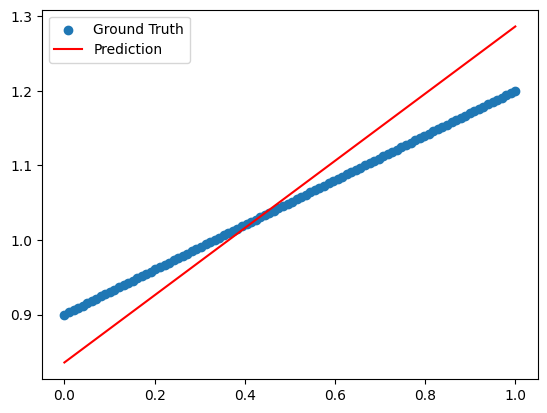

Epoch 720: Train Loss: 0.0281, Test Loss: 0.0666


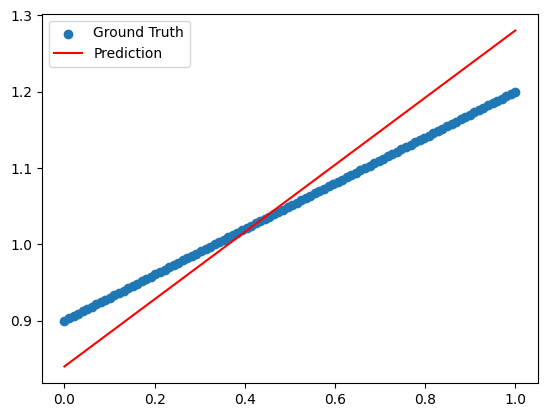

Epoch 740: Train Loss: 0.0256, Test Loss: 0.0619


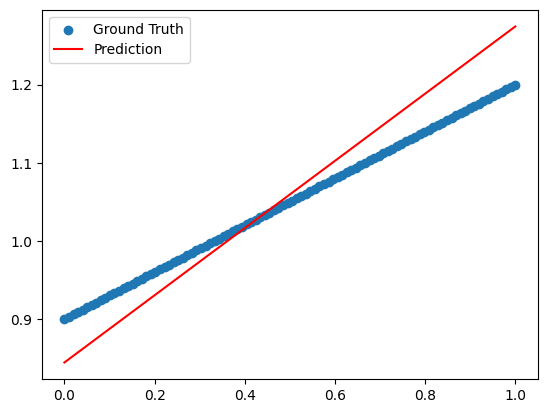

Epoch 760: Train Loss: 0.0247, Test Loss: 0.0564


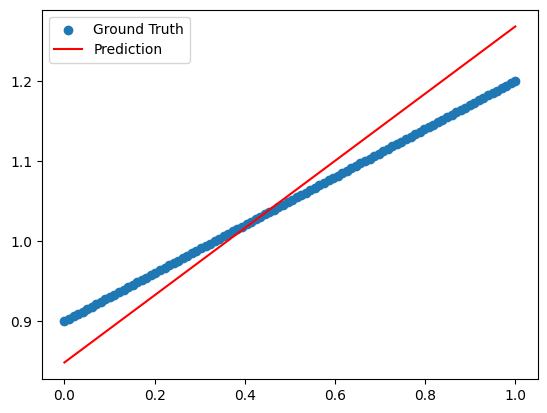

Epoch 780: Train Loss: 0.0212, Test Loss: 0.0515


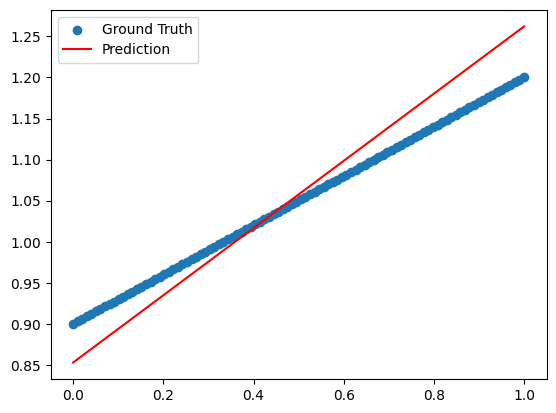

Epoch 800: Train Loss: 0.0201, Test Loss: 0.0467


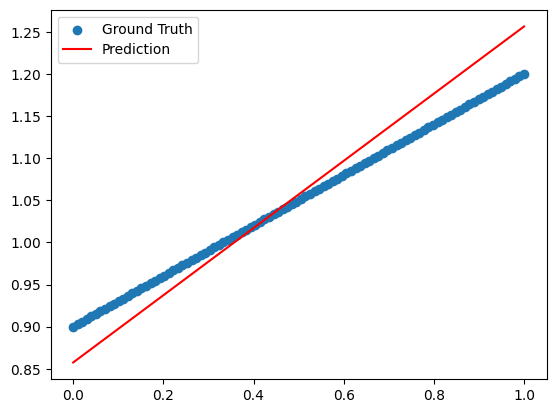

Epoch 820: Train Loss: 0.0180, Test Loss: 0.0421


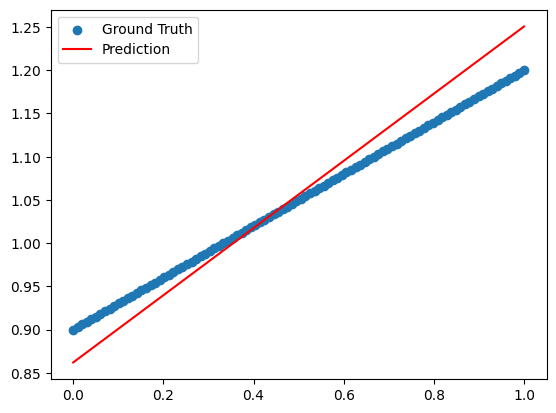

Epoch 840: Train Loss: 0.0158, Test Loss: 0.0377


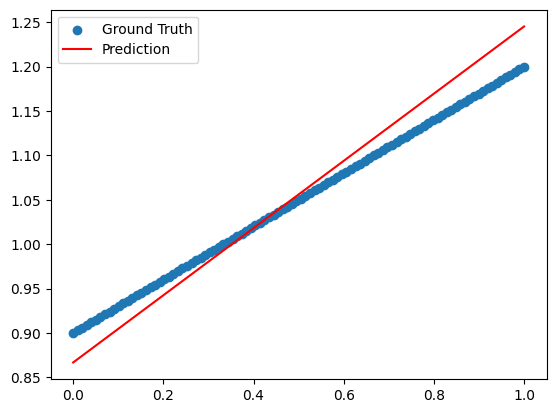

Epoch 860: Train Loss: 0.0140, Test Loss: 0.0320


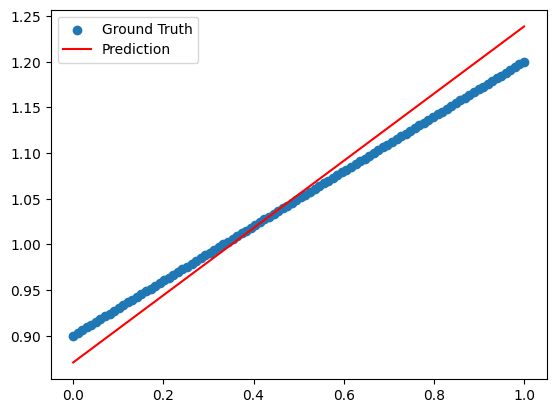

Epoch 880: Train Loss: 0.0117, Test Loss: 0.0276


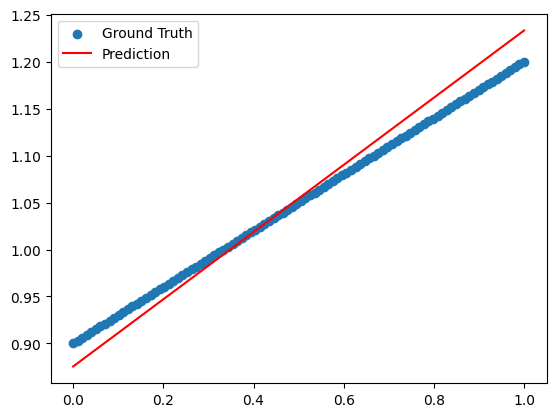

Epoch 900: Train Loss: 0.0095, Test Loss: 0.0227


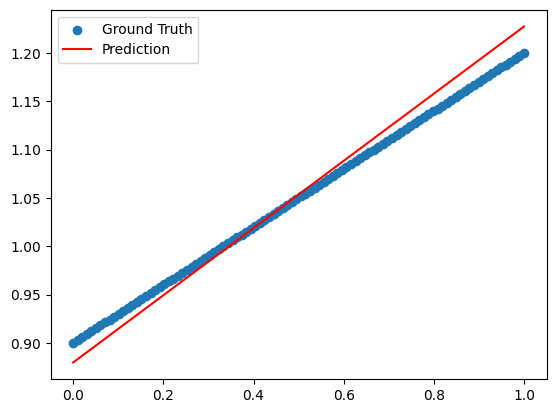

Epoch 920: Train Loss: 0.0075, Test Loss: 0.0174


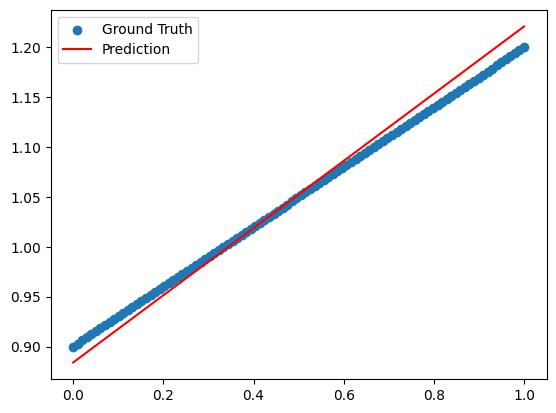

Epoch 940: Train Loss: 0.0056, Test Loss: 0.0129


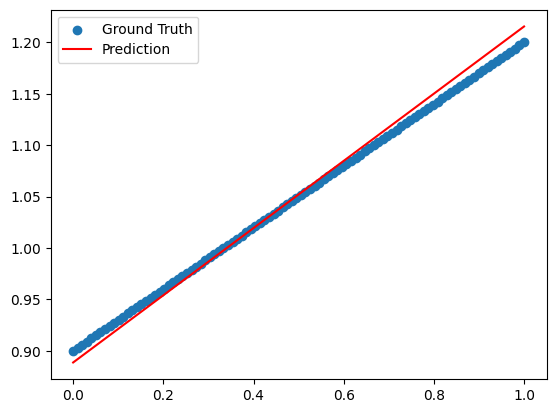

Epoch 960: Train Loss: 0.0033, Test Loss: 0.0076


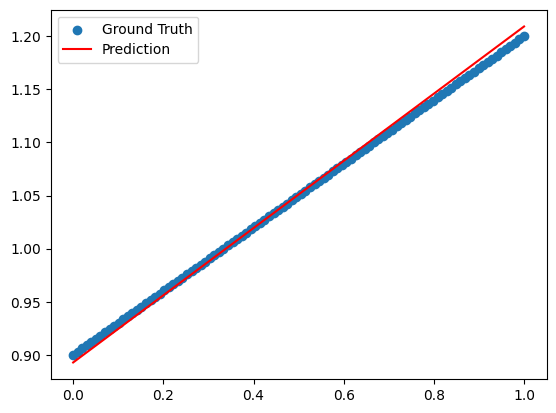

Epoch 980: Train Loss: 0.0013, Test Loss: 0.0028


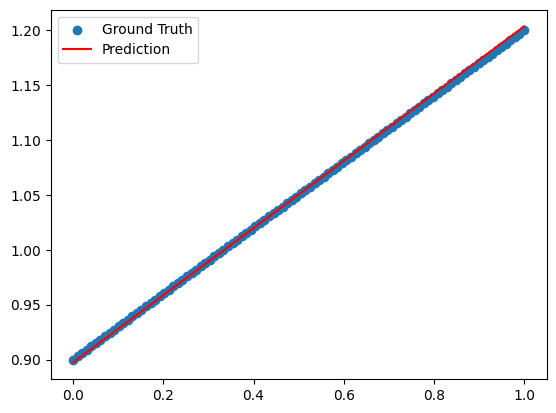

In [ ]:
epochs = 1000
for epoch in range(epochs):
    train_loss = train(model, train_dataloader, lossfunc, optimizer)

    if epoch % 20 == 0:
      model.eval()
      with torch.inference_mode():
        pred = model(x_test)
        test_loss = test(model, test_dataloader, lossfunc)

        print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
        plot_comparison(model, X, y)


#5. Save your trained model's state_dict() to file.

-Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

-Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
torch.save(model.state_dict(), "linear_model.pth")

loaded_model = LinearNetwork().to(device)
loaded_model.load_state_dict(torch.load("linear_model.pth"))

loaded_model.eval()
with torch.no_grad():
    predictions = loaded_model(x_test.to(device))
    print("Previsões batem:", torch.allclose(predictions, model(x_test.to(device))))


Previsões batem: True


<ipython-input-91-dbb69254e5ab>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load("linear_model.pth"))
